# This is Alphabates Prediction From (A-J) respect to (0-9) numbers.


*   here, I have traied 112 images for each and every alphabate.
*   This is not Mnist data set.



In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import pickle

In [0]:
# i all ready cleaned my data so i just load it back
# if you dont know how then check out my 0-9 number prediction file in same folder.
X_features = pickle.load(open("/content/drive/My Drive/GPU_DeepLearningWork/DeepLearning_GPU_Work/NotMnist_filterd_data/X_features.pickle","rb"))
Y_labels = pickle.load(open("/content/drive/My Drive/GPU_DeepLearningWork/DeepLearning_GPU_Work/NotMnist_filterd_data/Y_labels.pickle","rb"))

In [8]:
len(X_features), len(Y_labels), X_features[10],Y_labels[10]

(1120, 1120, array([[163, 163, 181, ...,   0,   0,   0],
        [163, 163, 181, ...,   0,   0,   0],
        [134, 134, 150, ...,   0,   0,   0],
        ...,
        [145, 145, 158, ...,   0,   0,   0],
        [176, 176, 192, ...,   0,   0,   0],
        [176, 176, 192, ...,   0,   0,   0]], dtype=uint8), 5)

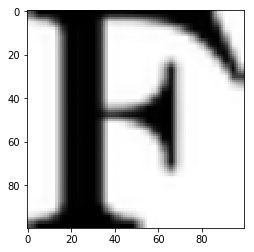

In [9]:
plt.imshow(X_features[10],cmap="binary")
plt.show()
# yeah features of array with label match correctly .. here [A-J] match with[0-9]

In [10]:
X_features = np.array(X_features).reshape(-1,100,100,1) 
# we need to pass again three args overhear also otherwise its just make it single vector array.
Y_labels = np.array(Y_labels).reshape(-1)
X_features.shape, Y_labels.shape

((1120, 100, 100, 1), (1120,))

In [0]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.5)
sess = tf.Session(config = tf.ConfigProto(gpu_options=gpu_options))
# normalization of data for easy to calculations.
X_features = X_features/255.0

In [12]:
# i dont want to run and test now its take time to train the data.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Activation,MaxPool2D,Dropout,Flatten
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=X_features.shape[1:]))
model.add(Activation('tanh'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3)))
model.add(Activation('tanh'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3)))
model.add(Activation('tanh'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dense(64))
model.add(Activation('tanh'))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
model.fit(X_features,Y_labels,batch_size=64,epochs=5,validation_split=0.3)

W0807 02:24:35.498045 140102887655296 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 784 samples, validate on 336 samples
Epoch 1/5
784/784 [==============================] - 33s 42ms/sample - loss: 1.5635 - acc: 0.4528 - val_loss: 1.3440 - val_acc: 0.6637
Epoch 2/5
784/784 [==============================] - 33s 42ms/sample - loss: 0.8348 - acc: 0.7602 - val_loss: 1.1466 - val_acc: 0.7381
Epoch 3/5
784/784 [==============================] - 32s 41ms/sample - loss: 0.6312 - acc: 0.8138 - val_loss: 1.1356 - val_acc: 0.7440
Epoch 4/5
784/784 [==============================] - 33s 42ms/sample - loss: 0.5180 - acc: 0.8622 - val_loss: 1.0185 - val_acc: 0.7798
Epoch 5/5
784/784 [==============================] - 32s 41ms/sample - loss: 0.3937 - acc: 0.8878 - val_loss: 0.9935 - val_acc: 0.7798


In [13]:
predict = model.predict([X_features])
predict, predict.shape

(array([[8.94167984e-04, 2.39499416e-02, 5.47315634e-04, ...,
         9.51054811e-01, 2.04308701e-04, 1.08908120e-04],
        [2.87993753e-04, 5.91003954e-05, 3.04318120e-04, ...,
         7.29787280e-06, 8.62301230e-01, 9.68222395e-02],
        [2.15290399e-07, 1.46909922e-04, 4.69910941e-04, ...,
         3.83775978e-06, 3.60824494e-03, 5.07948755e-07],
        ...,
        [4.44210172e-02, 1.14514224e-01, 1.14187773e-04, ...,
         2.65178345e-02, 6.32428467e-01, 6.65734038e-02],
        [2.75125843e-04, 2.23538918e-05, 2.59970778e-09, ...,
         7.26022620e-07, 2.20421643e-04, 9.99469221e-01],
        [2.48322642e-04, 9.39437712e-04, 1.46850711e-03, ...,
         2.37008557e-03, 9.39959282e-05, 2.15471751e-04]], dtype=float32),
 (1120, 10))

In [20]:
np.argmax(predict[68])  # lets test any number from the Prediction is accurate or not

4

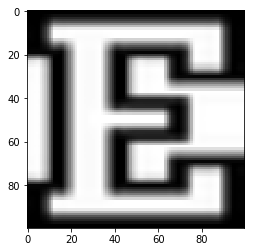

In [21]:
plt.imshow(np.squeeze(X_features[68]),cmap="binary")
plt.show()